#Creando Nombres

In [ ]:
import pandas as pd

In [ ]:
nombres_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=M&qtd=200")
nombres_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=F&qtd=200")

In [ ]:
type(nombres_f)

pandas.core.frame.DataFrame

In [ ]:
print("Cantidad de nombres :" + str(len(nombres_m) + len(nombres_f)))

Cantidad de nombres :400


In [ ]:
frames = [nombres_m, nombres_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198  

In [ ]:
nombres = pd.concat(frames)['nome'].to_frame()
nombres.columns = ['nombre']
nombres.sample(5)

nombre
69   REGINALDO
199    GEOVANE
171   VALDEMIR
179    LILIANE
188    POLIANA

In [ ]:
nombres.sample(5)

nombre
175  ALEXANDRA
99     WILLIAN
35   ALEXANDRE
52      SAMUEL
101     GISELE

#Incluyendo ID de alumnos

In [ ]:
import numpy as np

In [ ]:
np.random.seed(123)

In [ ]:
total_alumnos = len(nombres)
total_alumnos

400

In [ ]:
nombres['id_alumno'] = np.random.permutation(total_alumnos) + 1
nombres.sample(5)

nombre  id_alumno
188  VALDECIR        369
57       IGOR        303
3     ANTONIA        382
182   LIDIANE         33
30     ELIANE        111

In [ ]:
dominios = ['@dominiodeemail.com', '@serviciodeemail.com']

In [ ]:
nombres['dominio'] = np.random.choice(dominios, total_alumnos)
nombres.sample(5)

nombre  id_alumno               dominio
84     FATIMA         78   @dominiodeemail.com
0       MARIA        331  @serviciodeemail.com
179   LILIANE        340   @dominiodeemail.com
10       LUIS        174   @dominiodeemail.com
171  VALDEMIR         45   @dominiodeemail.com

In [ ]:
nombres['email'] = nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.sample(5)

nombre  id_alumno               dominio                        email
114      ELZA        320   @dominiodeemail.com      elza@dominiodeemail.com
57       IGOR        303  @serviciodeemail.com     igor@serviciodeemail.com
85   FABRICIO        221   @dominiodeemail.com  fabricio@dominiodeemail.com
183    MARLON          8   @dominiodeemail.com    marlon@dominiodeemail.com
189    WESLEI        137   @dominiodeemail.com    weslei@dominiodeemail.com

#Creando Cursos

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [ ]:
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
cursos = cursos[0]
cursos

Nome do curso
0                 Lógica de programação
1                         Java para Web
2                           C# para Web
3                         Ruby on Rails
4                      Cursos de Python
5                         PHP com MySql
6                         .NET para web
7            Novas integrações com Java
8                          TDD com Java
9                   Código limpo com C#
10  Preparatório para certificação Java
11                      Hardware básico
12                Persistência com .NET
13                  Desenvolvendo jogos
14                     Análise de dados
15                   Estatística básica
16                  Internet das coisas
17                Programação funcional
18                Boas práticas em Java
19          Orientação objetos com Java

In [ ]:
cursos.head()

Nome do curso
0  Lógica de programação
1          Java para Web
2            C# para Web
3          Ruby on Rails
4       Cursos de Python

#Adicionando Index

In [ ]:
cursos = cursos.rename(columns={'Nome do curso' : 'nombre_curso'})

In [ ]:
cursos['id'] = cursos.index + 1
cursos

nombre_curso  id
0                 Lógica de programação   1
1                         Java para Web   2
2                           C# para Web   3
3                         Ruby on Rails   4
4                      Cursos de Python   5
5                         PHP com MySql   6
6                         .NET para web   7
7            Novas integrações com Java   8
8                          TDD com Java   9
9                   Código limpo com C#  10
10  Preparatório para certificação Java  11
11                      Hardware básico  12
12                Persistência com .NET  13
13                  Desenvolvendo jogos  14
14                     Análise de dados  15
15                   Estatística básica  16
16                  Internet das coisas  17
17                Programação funcional  18
18                Boas práticas em Java  19
19          Orientação objetos com Java  20

In [ ]:
cursos = cursos.set_index('id')
cursos.head()

nombre_curso
id                       
1   Lógica de programação
2           Java para Web
3             C# para Web
4           Ruby on Rails
5        Cursos de Python

In [ ]:
cursos.shape

(20, 1)

#Matriculando Alumnos

In [ ]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

nombre  id_alumno  ...                         email matriculas
0       JOSE        235  ...       jose@dominiodeemail.com          1
1       JOAO         43  ...      joao@serviciodeemail.com          1
2    ANTONIO        304  ...   antonio@serviciodeemail.com          5
3  FRANCISCO        156  ...  francisco@dominiodeemail.com          5
4     CARLOS        343  ...    carlos@serviciodeemail.com          1

[5 rows x 5 columns]

In [ ]:
nombres.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


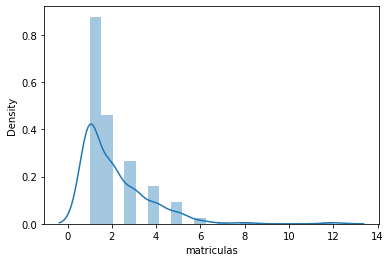

In [ ]:
sns.distplot(nombres.matriculas)

In [ ]:
nombres.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

#Seleccionando Alumnos

In [ ]:
nombres.head()

nombre  id_alumno  ...                         email matriculas
0       JOSE        235  ...       jose@dominiodeemail.com          1
1       JOAO         43  ...      joao@serviciodeemail.com          1
2    ANTONIO        304  ...   antonio@serviciodeemail.com          5
3  FRANCISCO        156  ...  francisco@dominiodeemail.com          5
4     CARLOS        343  ...    carlos@serviciodeemail.com          1

[5 rows x 5 columns]

In [ ]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)
prob

array([0.08748268, 0.01944097, 0.00010485, 0.07908052, 0.00965848,
       0.04632804, 0.09397694, 0.04413282, 0.00605769, 0.00205952,
       0.10409509, 0.09403739, 0.07504626, 0.00097276, 0.08769762,
       0.04961104, 0.00952719, 0.08670268, 0.0795945 , 0.02439293])

In [ ]:
for index, row in nombres.iterrows():
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index , p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_alumno', 'id_curso'])
matriculas.head()

id_alumno  id_curso
0        235         7
1         43        19
2        304         4
3        304        18
4        304        13

In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])[['nombre_curso', 'id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending = False)
matriculas_por_curso

#Salida en diferentes formatos

In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [ ]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [ ]:
matriculas_por_curso.to_html('matriculas_por_curso.html', index = False)